# Introduction à la bioacoustique

La bioacoustique, c'est l'étude des signaux sonores produits par les animaux.
Dans cette activité, vous allez manipuler des signaux sonores pour découvrir les principaux concepts de la bioacoustique.

## Etape 1 : L'enregistrement des sons

Avant de pouvoir étudier les signaux sonores produits par les animaux, il faut les enregistrer sur le terrain. Cela nécessite du matériel (microphone, enregistreur, etc) et une logistique plus ou moins complexe (animaux difficiles à approcher, lieux difficiles d'accès, etc.).

Dans cette activité, vous allez enregistrer vos propres voix avec le microphone de vos ordinateurs et les étudier avec des outils simples de bioacoustique.

**Exercice**
Vous allez enregistrer vos voix. Rendez-vous sur ce site [ce site](https://online-voice-recorder.com/fr).

![Page d'accueil du site web online-voice-reocrder.com](images/voice_recorder_1.png)

Enregistrez les phonèmes suivants en cinq exemplaires : un long **"AAAAA"**, un long **"EEEEE"**, un long **"IIIII"**, un long **"OOOOO"**, un long **"UUUUU"**, et un long **"FFFFF"**.

Il vous faut cinq exemplaires de chaque son. Essayez de produire des sons de deux secondes, et laissez un peu de silence avant et après vos voix.

Pour aller plus vite, vous pouvez faire un long enregistrement où vous prononcez chaque son une fois, puis enregistrer chaque son individuellement en déplaçant les bornes bleues de l'intervale à l'écran.

![Apparence du site web online-voice-recorder.com après un enregistrement](images/voice_recorder_2.png)

Renommez vos fichers avec le format suivant : **SON_NOM_NUMERO** (par exemple, "AAAAA_BENTI_3.mp3"). Cliquez sur l'icone dossier en haut à gauche de cette page internet, et glissez-déposez vos enregistrements dans le dossier "enregistrements".

Envoyez-moi vos enregistrements par mail (benjamin.benti@protonmail.com) pour que je prépare le bilan de l'activité.

![Localisation des enregistrements locaux dans le notebook](images/depot_enregistrements.png)

## Etape 2 :  La caractérisation des sons.

### Bon, c'est quoi au juste, un son ?

Maintenant que vous avez vos enregistrements, vous allez pouvoir analyser vos voix.
Concrètement, à quoi ressemblent-elles ?

In [2]:
# Code python pour le prétraitement et l'harmonisation des enregistrements.
# Vous n'avez pas besoin de regarder les sections de code dans le détail.
# Si ça vous intéresse ou si vous avez des questions, vous pouvez m'envoyer un mail : benjamin.benti@protonmail.com

%matplotlib inline

# Import des librairies nécessaires pour le traitement audio et la visualisation
import pathlib
import random as rd
import numpy as np
import pandas as pd
import librosa as lib
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as sig
import ipywidgets as widgets

# Récupérer la liste des fichiers.
audio_folder = pathlib.Path('enregistrements')
file_list = [f for f in audio_folder.glob("*")]

# Prétraitement des enregistrements : filtre bande-bassante entre 50 et 4000 Hz, downsampling à 8000 Hz, harmonisation.
df = pd.DataFrame(columns=['ind', 'type', 'sound'], dtype=object)
for i, f in enumerate(file_list):
    # Charger l'enregistrement.
    y, sr = sf.read(f)
    
    # Construction d'un filtre bande-passante entre 50 Hz et 4000 Hz.
    sos = sig.butter(4, (50, 4000), btype="bp", output="sos", fs=sr)
    # Filtrer les enregistrements.
    y_filt = sig.sosfilt(sos, y, axis=0)
    
    # Harmoniser la fréquence d'échantillonage de tous les enregistrements à 8000 Hz.
    y_ds = sig.decimate(y_filt, round(sr/8000), axis=0)
    
    # Harmoniser l'amplitude des enregistrements.
    norm = np.max(np.abs(y_ds))
    y_harm = y_ds / norm

    # Stocker les enregistrements prétraités dans la base de données.
    fn = str(f)
    type = fn.split('/')[-1].split('_')[0]
    ind = fn.split('/')[-1].split('_')[1]
    df.loc[i, 'ind'] = ind
    df.loc[i, 'type'] = type
    df.loc[i, 'sound'] = y_harm
df.head()


,ind,type,sound
0,BENTI,enregistrements\AAAAA,"[-1.0214839037453926e-09, 1.3618221222312476e-..."
1,BENTI,enregistrements\AAAAA,"[-5.416623758947938e-206, 1.0323889889011994e-..."
2,BENTI,enregistrements\AAAAA,"[8.249933174579511e-195, 1.7592707196991804e-1..."
3,BENTI,enregistrements\AAAAA,"[9.07097483609283e-206, -1.1770441349820682e-2..."
4,BENTI,enregistrements\AAAAA,"[5.838753616675435e-195, -2.9232740981148886e-..."


In [3]:
# Code python pour la visualisation des enregistrements.
from IPython.display import display

def waveform_selecttime(y, sr, xlimits=(0, 2.5)):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot([i/sr for i in range(len(y))], y)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (u. a.)')
    ax.set_xlim(xlimits)
    plt.show()

y = rd.choice(df.sound)  # Choisir un enregistrement au hasard.

xlimits=widgets.FloatRangeSlider(min=0, max=3, step=0.001, value=(0, 2.5))
out = widgets.interactive_output(waveform_selecttime, {'y': widgets.fixed(y),
                                                       'sr': widgets.fixed(8000),
                                                       'xlimits': xlimits})
widgets.VBox([xlimits, out])


Un son, c'est un ensemble de vibrations de l'air : des fluctuations de pression de différentes fréquences et de différentes amplitudes.

Quand on enregistre un son, on obtient une forme d'onde, qui représente ces fluctuations au cours du temps. C'est un format plutôt obscur, il est difficile d'en extraire directement des informations.

Text(0.5, 1.0, 'Mini-quizz : quel est ce son ?')

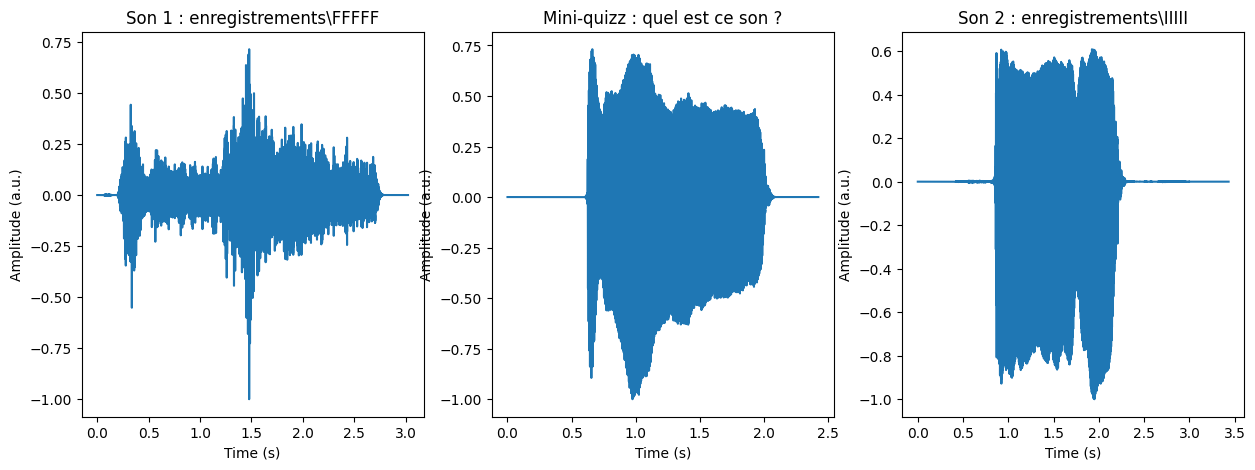

In [4]:
# Code python - mini-quizz sur les formes d'onde.

# Choisir des sons au hasard.
son1 = rd.choice(list(set(df.type)))
same = True
while same:
    son2 = rd.choice(list(set(df.type)))
    same = (son2 == son1)

ex1 = rd.choice(df.loc[df.type==son1].index)
ex2 = rd.choice(df.loc[df.type==son2].index)
same = True
while same:
    ex3 = rd.choice(pd.concat((df.loc[df.type==son1], df.loc[df.type==son2])).index)
    same = (ex3 == ex1 or ex3 == ex2)

# Construire la figure.
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)

y1 = df.loc[ex1, 'sound']
ax1.plot([i/8000 for i in range(len(y1))], y1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (a.u.)')
y2 = df.loc[ex2, 'sound']
ax2.plot([i/8000 for i in range(len(y2))], y2)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (a.u.)')
y3 = df.loc[ex3, 'sound']
ax3.plot([i/8000 for i in range(len(y3))], y3)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude (a.u.)')

ax1.set_title('Son 1 : {}'.format(df.loc[ex1, 'type']))
ax2.set_title('Son 2 : {}'.format(df.loc[ex2, 'type']))
ax3.set_title('Mini-quizz : quel est ce son ?')


In [5]:
# Résultat du quizz.
print('Le son mystère était...')
print('drum rolls...')
print(df.loc[ex3, "type"])

Le son mystère était...
drum rolls...
enregistrements\IIIII


### Un outil magique pour visualiser et analyser les sons : le **spectrogramme**

On a vu qu'un son est un ensemble de fluctuations de pression à différentes amplitudes et à différentes fréquences. Il est très difficile d'évaluer ces fréquences et ces amplitudes en regardant la forme d'onde.

En bioacoustique, l'outil principal que l'on utilise pour mieux caractériser les sons, c'est le **spectrogramme**. C'est une transformation mathématique des sons qui permet de voir la composition en fréquences d'un son.

Text(0.5, 1.0, "Spectrogramme d'un enregistrements\\IIIII")

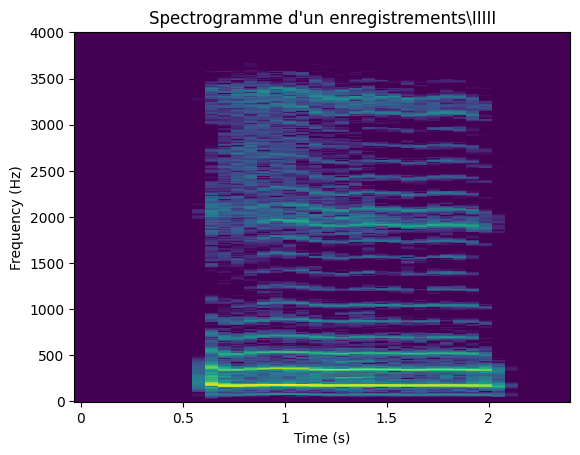

In [6]:
# Code python pour le calcul et la visualisation des spectrogrammes.

def custom_spectro(signal, nfft=1024, ovlp=0.5, win='hann'):
    """
    Computes the spectrogram of a signal using the input parameters.
    """
    wind = sig.get_window(win, nfft)
    S = lib.stft(signal, n_fft=nfft, hop_length=round(nfft*ovlp), window=wind)
    return S

def plot_spectro(S, sr, nfft, ovlp, fig, ax, cmap='viridis'):
    """
    Plots a spectrogram.
    """
    img = lib.display.specshow(lib.amplitude_to_db(np.abs(S), ref=np.max),
                               sr=sr, n_fft=nfft, hop_length=round(nfft*ovlp),
                               ax=ax, y_axis='linear', x_axis='time', cmap="viridis"
                               )    
    return fig, ax

# Construire le spectrogramme du son du quizz précédent.
S = custom_spectro(df.loc[ex3, 'sound'])
fig = plt.figure()
ax = fig.add_subplot()
plot_spectro(S, 8000, 1024, 0.5, fig, ax)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title("Spectrogramme d'un {}".format(df.loc[ex3, 'type']))

Dans les sons animaux, la distribution des fréquences n'est pas aléatoire.

In [7]:
# Code python pour l'analyse de la distribution des fréquences.

def magnitude_lines(y, sr, F0, xmax=4000):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.magnitude_spectrum(y[int(1*8000):2*8000], Fs=8000)
    for i in range(1, 1000):
        if F0*i <= 4000:
            ax.axvline(F0*i, color='black')
    ax.set_xlim(0, xmax)
    plt.show()

F0 = widgets.IntSlider(description='F0', min=0, max=500, step=1, value=100)
xmax = widgets.IntSlider(description='Fmax', min=500, max=4000, step=500, value=4000)
out = widgets.interactive_output(magnitude_lines, {'y': widgets.fixed(df.loc[ex3, 'sound']),
                                                   'sr': widgets.fixed(8000),
                                                   'F0': F0,
                                                   'xmax': xmax
                                                   }
                                )
widgets.VBox([widgets.HBox([F0, xmax]), out])

### A vous de jouer !!

Utilisez le code de la cellule suivante pour mesurer, pour chacun de vos enregistrements :
- la fréquence fondamentale **F0**
- la fréquence d'intensité maximale **Fmax**

Notez vos mesures dans un fichier excel (

In [9]:
# Modifiez les lignes suivantes pour sélectionner votre enregistrement.
nom = 'BENTI'
son = 'UUUUU'
numero = 1

y = df.loc[df.ind==nom].loc[df.type==son].iloc[numero-1].sound

IndexError: single positional indexer is out-of-bounds

In [233]:
# Mesure la fréquence fondamentale.
F0 = widgets.IntSlider(description='F0', min=0, max=500, step=1, value=100)
xmax = widgets.IntSlider(description='Fmax', min=500, max=4000, step=500, value=4000)
out = widgets.interactive_output(magnitude_lines, {'y': widgets.fixed(y),
                                                   'sr': widgets.fixed(8000),
                                                   'F0': F0,
                                                   'xmax': xmax
                                                   }
                                )
widgets.VBox([widgets.HBox([F0, xmax]), out])

In [235]:
# Mesurer la fréquence maximale.
s, f, l = plt.magnitude_spectrum(y[8000:2*8000], 8000)
plt.close()
print('La fréquence maximale de ce son est {} Hz'.format(round(f[np.argmax(s)])))

La fréquence maximale de ce son est 171 Hz


#### Etape 3 : Analyser les variations sonores

Maintenant que nous avons :
1. Enregistré des sons et
2. Mesuré des paramètres acoustiques sur ces enregistrements,

nous pouvons procéder à des comparaisons intra- et inter-individuelles pour répondre à des questions biologiques.

### 1ère question : pouvons-nous décrire un mini-répertoire vocal pour l'être humain ?

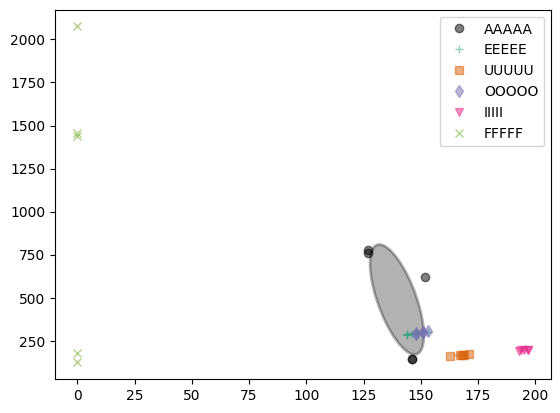

In [10]:
# Code pour représenter les mesures réalisées sur les différents types de sons.

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

tab = pd.read_csv('mesures/BENTI_mesures.csv')

fig = plt.figure()
ax = fig.add_subplot()
colorset = ["#000000", "#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e"]
markerset = ["o", "+", "s", "d", "v", 'x']
for i, elt in enumerate(list(set(tab.type_de_son))):
    tmp = tab.loc[tab.type_de_son==elt]
    ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[i], linewidth=0, alpha=0.5)
    ax.legend(labels = list(set(tab.type_de_son)))

# Add ellipse.
for i, elt in enumerate(list(set(tab.type_de_son))):
    tmp = tab.loc[tab.type_de_son==elt]
    cov = np.cov(tmp.F0, tmp.Fmax)
    if cov[0, 0] != 0 and cov[1, 1] != 0:
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        # Get the ellipse radius.
        radius_x = np.sqrt(1 + pearson)
        radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0),
                          width=radius_x * 2,
                          height=radius_y * 2,
                          facecolor=colorset[i],
                          alpha=0.3,
                          edgecolor=colorset[i],
                          linewidth=2
                          )
        # Scale and center.
        scale_x = np.sqrt(cov[0, 0])
        scale_y = np.sqrt(cov[1, 1])
        # Rotate and scale the ellipse.
        transf = transforms.Affine2D() \
                 .rotate_deg(45) \
                 .scale(scale_x, scale_y) \
                 .translate(np.mean(tmp.F0), np.mean(tmp.Fmax))
        ellipse.set_transform(transf + ax.transData)
        ax.add_patch(ellipse)



AAAAA [[   138.3   -2456.95]
 [ -2456.95 101918.3 ]]
EEEEE [[14.   20.75]
 [20.75 32.2 ]]
UUUUU [[8.8 8.8]
 [8.8 8.8]]
OOOOO [[ 4.7  11.05]
 [11.05 29.7 ]]
IIIII [[3.2 3.2]
 [3.2 3.2]]


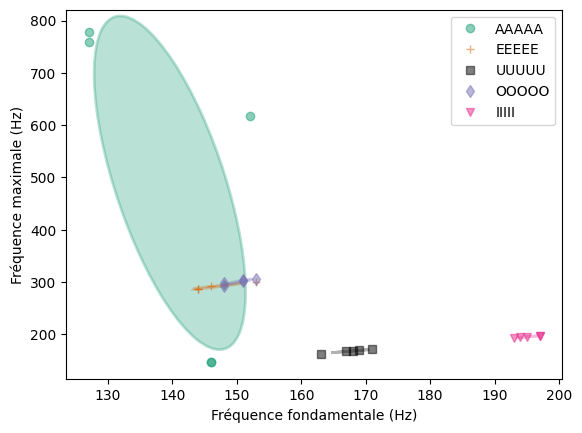

In [12]:
# Code pour représenter les mesures réalisées sur les différents types de sons, excluant les FFFFF.

tab = pd.read_csv('mesures/BENTI_mesures.csv')

fig = plt.figure()
ax = fig.add_subplot()
colorset = ["#1b9e77", "#d95f02", "#000000", "#7570b3", "#e7298a", "#66a61e"]
markerset = ["o", "+", "s", "d", "v", 'x']

lst = list(set(tab.type_de_son))
lst.remove('FFFFF')

for i, elt in enumerate(list(set(tab.type_de_son))):
    if elt == 'FFFFF':
        continue
    tmp = tab.loc[tab.type_de_son==elt]
    ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[i], linewidth=0, alpha=0.5)
    ax.set_xlabel('Fréquence fondamentale (Hz)')
    ax.set_ylabel('Fréquence maximale (Hz)')
    ax.legend(labels = lst)

# Add ellipse.
for i, elt in enumerate(list(set(tab.type_de_son))):
    if elt == 'FFFFF':
        continue
    tmp = tab.loc[tab.type_de_son==elt]
    cov = np.cov(tmp.F0, tmp.Fmax)
    print(elt, cov)
    if cov[0, 0] != 0 and cov[1, 1] != 0:
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        # Get the ellipse radius.
        radius_x = np.sqrt(1 + pearson)
        radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0),
                          width=radius_x * 2,
                          height=radius_y * 2,
                          facecolor=colorset[i],
                          alpha=0.3,
                          edgecolor=colorset[i],
                          linewidth=2
                          )
        # Scale and center.
        scale_x = np.sqrt(cov[0, 0])
        scale_y = np.sqrt(cov[1, 1])
        # Rotate and scale the ellipse.
        transf = transforms.Affine2D() \
                 .rotate_deg(45) \
                 .scale(scale_x, scale_y) \
                 .translate(np.mean(tmp.F0), np.mean(tmp.Fmax))
        ellipse.set_transform(transf + ax.transData)
        ax.add_patch(ellipse)



## 2ème question: Existe-t-il des différences interindividuelles dans les voix humaines ? Comment les expliquer ?

(cf. activité "Voix des hommes" au début du TP)

In [13]:
# Code pour regrouper les mesures faites par différents membres du groupe.

#=====> Rentrer les noms des membres du groupe dans la liste.
liste_individus = ["BENTI", "LEMAIRE"]

data = pd.DataFrame()
for i in liste_individus:
    tab = pd.read_csv("mesures/{}_mesures.csv".format(i))
    data = pd.concat((data, tab))
    data.index = range(data.shape[0])


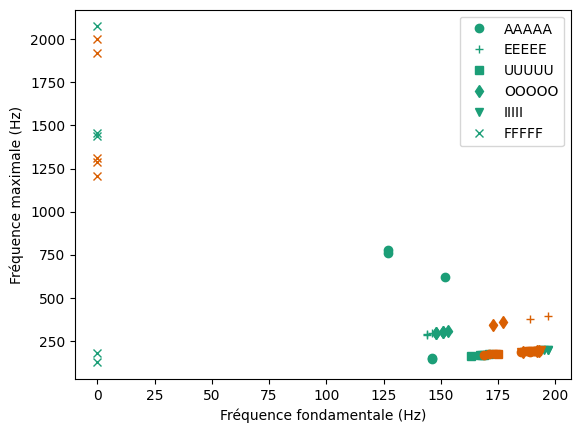

In [14]:
# Code pour visualiser les données de tout le groupe.

fig = plt.figure()
ax = fig.add_subplot()

color_set = ["#000000", "#009292", "#ff6db6", "#490092", "#006ddb",
              "#924900", "#004949", "#ffb6db", "#b66dff", "#6db6ff",
              "#db6d00"
              ]
markerset = ["o", "+", "s", "d", "v", 'x']

for i, ind in enumerate(liste_individus):
    for j, elt in enumerate(list(set(data.type_de_son))):
        tmp = data.loc[data.NOM==ind].loc[data.type_de_son==elt]
        ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[j], linewidth=0)
    ax.legend(labels = list(set(data.type_de_son)))
    ax.set_xlabel('Fréquence fondamentale (Hz)')
    ax.set_ylabel('Fréquence maximale (Hz)')


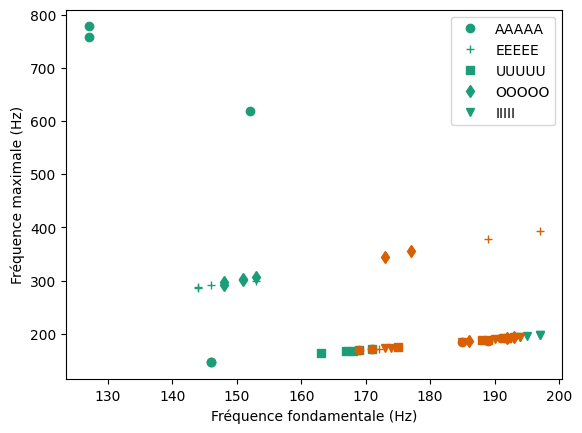

In [15]:
# Code pour visualiser les données de tout le groupe, sans les FFFFF.

fig = plt.figure()
ax = fig.add_subplot()

color_set = ["#000000", "#009292", "#ff6db6", "#490092", "#006ddb",
              "#924900", "#004949", "#ffb6db", "#b66dff", "#6db6ff",
              "#db6d00"
              ]
markerset = ["o", "+", "s", "d", "v", 'x']

for i, ind in enumerate(liste_individus):
    for j, elt in enumerate(list(set(data.type_de_son))):
        if elt == "FFFFF":
            continue
        tmp = data.loc[data.NOM==ind].loc[data.type_de_son==elt]
        ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[j], linewidth=0)
    ax.legend(labels = lst)
    ax.set_xlabel('Fréquence fondamentale (Hz)')
    ax.set_ylabel('Fréquence maximale (Hz)')


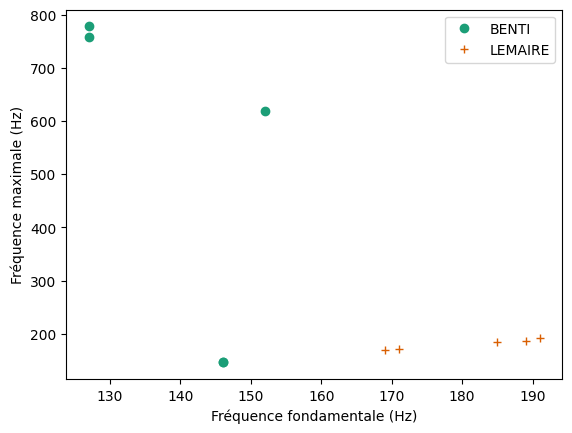

In [16]:
# Code pour comparer les mesures réalisées pour un même son par différents membres du groupe.

son = 'AAAAA'  # LA IL FAUT REMPLACER PAR LE SON QUI VOUS INTERESSE.

fig = plt.figure()
ax = fig.add_subplot()

color_set = ["#000000", "#009292", "#ff6db6", "#490092", "#006ddb",
              "#924900", "#004949", "#ffb6db", "#b66dff", "#6db6ff",
              "#db6d00"
              ]
markerset = ["o", "+", "s", "d", "v", 'x', "^", "8", "p", "*", "h"]

for i, ind in enumerate(liste_individus):
    tmp = data.loc[data.type_de_son==son].loc[data.NOM==ind]
    ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[i], linewidth=0)
    ax.set_xlabel('Fréquence fondamentale (Hz)')
    ax.set_ylabel('Fréquence maximale (Hz)')
    ax.legend(labels = liste_individus)